# NBA Web Scraping Project — Basketball-Reference  
Student: Hannah Raquel Melio  
Course: CMP 262 — Data Science Programming

## Project Overview

In this project I scrape NBA statistics from Basketball-Reference.com.  
I read data from several pages, place the tables into pandas DataFrames, lightly clean them, and answer data questions.  
I use Seaborn to create simple visualizations in **medium orchid** and a lighter purple (**thistle**).

## Pages Used

I scrape at least five pages from Basketball-Reference:

- https://www.basketball-reference.com/leagues/NBA_2025_per_game.html  
- https://www.basketball-reference.com/leagues/NBA_2024_per_game.html  
- https://www.basketball-reference.com/leagues/NBA_2024_leaders.html  
- https://www.basketball-reference.com/leagues/NBA_2023_per_game.html  
- https://www.basketball-reference.com/leagues/NBA_2022_per_game.html  

For my main analysis, I focus on the **2023–24** and **2024–25** per-game stats tables.

## Questions

1. How does average points per game change with player age?  
2. Which teams have the highest average assists in 2024–25?  
3. Which players improved the most from 2023–24 to 2024–25?  
4. How do LeBron James’s points and assists compare to league averages in 2024–25?  
5. Did LeBron James’s scoring and assists improve from 2023–24 to 2024–25?


## Imports

In this section I import the Python libraries I need for scraping, data analysis, and plotting.


In [33]:
import pandas as pd
import requests
import time
import seaborn as sns
import matplotlib.pyplot as plt

# Simple Seaborn style
sns.set_theme(style="whitegrid")

## Scraping

In this section I download the HTML from each web page using `requests`.  
Then I use `pandas.read_html()` to read the main stats tables into DataFrames.  
I add a short delay between requests to be polite to the website.


### 2024–25 per-game stats

In [34]:
html_2025 = requests.get(
    "https://www.basketball-reference.com/leagues/NBA_2025_per_game.html"
).text.replace("<!--", "").replace("-->", "")
time.sleep(1)
per_game_2025 = pd.read_html(html_2025, attrs={"id": "per_game_stats"})[0]
per_game_2025.head()

,Rk,Player,Age,Team,Pos,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Awards
0,1.0,Shai Gilgeous-Alexander,26.0,OKC,PG,76.0,76.0,34.2,11.3,21.8,...,0.9,4.1,5.0,6.4,1.7,1.0,2.4,2.2,32.7,"MVP-1,DPOY-10,CPOY-8,AS,NBA1"
1,2.0,Giannis Antetokounmpo,30.0,MIL,PF,67.0,67.0,34.2,11.8,19.7,...,2.2,9.7,11.9,6.5,0.9,1.2,3.1,2.3,30.4,"MVP-3,DPOY-8,AS,NBA1"
2,3.0,Nikola JokiÄ,29.0,DEN,C,70.0,70.0,36.7,11.2,19.5,...,2.9,9.9,12.7,10.2,1.8,0.6,3.3,2.3,29.6,"MVP-2,CPOY-2,AS,NBA1"
3,4.0,Luka DonÄiÄ,25.0,2TM,PG,50.0,50.0,35.4,9.2,20.5,...,0.8,7.4,8.2,7.7,1.8,0.4,3.6,2.5,28.2,NaN
4,4.0,Luka DonÄiÄ,25.0,DAL,PG,22.0,22.0,35.7,9.8,21.2,...,0.7,7.6,8.3,7.8,2.0,0.4,3.4,2.6,28.1,NaN


### 2023–24 per-game stats

In [35]:
html_2024 = requests.get(
    "https://www.basketball-reference.com/leagues/NBA_2024_per_game.html"
).text.replace("<!--", "").replace("-->", "")
time.sleep(1)
per_game_2024 = pd.read_html(html_2024, attrs={"id": "per_game_stats"})[0]
per_game_2024.head()

,Rk,Player,Age,Team,Pos,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Awards
0,1.0,Joel Embiid,29.0,PHI,C,39.0,39.0,33.6,11.5,21.8,...,2.4,8.6,11.0,5.6,1.2,1.7,3.8,2.9,34.7,AS
1,2.0,Luka DonÄiÄ,24.0,DAL,PG,70.0,70.0,37.5,11.5,23.6,...,0.8,8.4,9.2,9.8,1.4,0.5,4.0,2.1,33.9,"MVP-3,CPOY-6,AS,NBA1"
2,3.0,Giannis Antetokounmpo,29.0,MIL,PF,73.0,73.0,35.2,11.5,18.8,...,2.7,8.8,11.5,6.5,1.2,1.1,3.4,2.9,30.4,"MVP-4,DPOY-9,CPOY-12,AS,NBA1"
3,4.0,Shai Gilgeous-Alexander,25.0,OKC,PG,75.0,75.0,34.0,10.6,19.8,...,0.9,4.7,5.5,6.2,2.0,0.9,2.2,2.5,30.1,"MVP-2,DPOY-7,CPOY-3,AS,NBA1"
4,5.0,Jalen Brunson,27.0,NYK,PG,77.0,77.0,35.4,10.3,21.4,...,0.6,3.1,3.6,6.7,0.9,0.2,2.4,1.9,28.7,"MVP-5,CPOY-5,AS,NBA2"


### 2023–24 leaders page

Here I read the leaders page. I do not use this table in later questions, but it shows that my code can scrape another Basketball-Reference page.


In [36]:
html_leaders_2024 = requests.get(
    "https://www.basketball-reference.com/leagues/NBA_2024_leaders.html"
).text.replace("<!--", "").replace("-->", "")
time.sleep(1)
leaders_2024 = pd.read_html(html_leaders_2024)[0]
leaders_2024.head()

,0,1,2
0,1.0,Luka DonÄiÄ • DAL,2370
1,2.0,Shai Gilgeous-Alexander • OKC,2254
2,3.0,Giannis Antetokounmpo • MIL,2222
3,4.0,Jalen Brunson • NYK,2212
4,5.0,Nikola JokiÄ • DEN,2085


### 2022–23 per-game stats

This is another extra page to show scraping from multiple seasons.


In [37]:
html_2023 = requests.get(
    "https://www.basketball-reference.com/leagues/NBA_2023_per_game.html"
).text.replace("<!--", "").replace("-->", "")
time.sleep(1)
per_game_2023 = pd.read_html(html_2023, attrs={"id": "per_game_stats"})[0]
per_game_2023.head()

,Rk,Player,Age,Team,Pos,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Awards
0,1.0,Joel Embiid,28.0,PHI,C,66.0,66.0,34.6,11.0,20.1,...,1.7,8.4,10.2,4.2,1.0,1.7,3.4,3.1,33.1,"MVP-1,DPOY-9,CPOY-5,AS,NBA1"
1,2.0,Luka DonÄiÄ,23.0,DAL,PG,66.0,66.0,36.2,10.9,22.0,...,0.8,7.8,8.6,8.0,1.4,0.5,3.6,2.5,32.4,"MVP-8,CPOY-8,AS,NBA1"
2,3.0,Damian Lillard,32.0,POR,PG,58.0,58.0,36.3,9.6,20.7,...,0.8,4.0,4.8,7.3,0.9,0.3,3.3,1.9,32.2,"CPOY-10,AS,NBA3"
3,4.0,Shai Gilgeous-Alexander,24.0,OKC,PG,68.0,68.0,35.5,10.4,20.3,...,0.9,4.0,4.8,5.5,1.6,1.0,2.8,2.8,31.4,"MVP-5,CPOY-7,AS,NBA1"
4,5.0,Giannis Antetokounmpo,28.0,MIL,PF,63.0,63.0,32.1,11.2,20.3,...,2.2,9.6,11.8,5.7,0.8,0.8,3.9,3.1,31.1,"MVP-3,DPOY-6,AS,NBA1"


### 2021–22 per-game stats

This is a fifth page to satisfy the “at least five pages” requirement.


In [38]:
html_2022 = requests.get(
    "https://www.basketball-reference.com/leagues/NBA_2022_per_game.html"
).text.replace("<!--", "").replace("-->", "")
time.sleep(1)
per_game_2022 = pd.read_html(html_2022, attrs={"id": "per_game_stats"})[0]
per_game_2022.head()

,Rk,Player,Age,Team,Pos,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Awards
0,1.0,Joel Embiid,27.0,PHI,C,68.0,68.0,33.8,9.8,19.6,...,2.1,9.6,11.7,4.2,1.1,1.5,3.1,2.7,30.6,"MVP-2,AS,NBA2"
1,2.0,LeBron James,37.0,LAL,C,56.0,56.0,37.2,11.4,21.8,...,1.1,7.1,8.2,6.2,1.3,1.1,3.5,2.2,30.3,"MVP-10,AS,NBA3"
2,3.0,Giannis Antetokounmpo,27.0,MIL,PF,67.0,67.0,32.9,10.3,18.6,...,2.0,9.6,11.6,5.8,1.1,1.4,3.3,3.2,29.9,"MVP-3,DPOY-6,AS,NBA1,DEF1"
3,4.0,Kevin Durant,33.0,BRK,PF,55.0,55.0,37.2,10.5,20.3,...,0.5,6.9,7.4,6.4,0.9,0.9,3.5,2.1,29.9,"MVP-10,AS,NBA2"
4,5.0,Luka DonÄiÄ,22.0,DAL,PG,65.0,65.0,35.4,9.9,21.6,...,0.9,8.3,9.1,8.7,1.2,0.6,4.5,2.2,28.4,"MVP-5,AS,NBA1"


## Minimal Cleaning

Basketball-Reference tables are already quite clean.  
I only do two simple cleaning steps on the 2023–24 and 2024–25 per-game tables:

1. Remove repeated header rows inside the tables (rows where `Rk` appears again).  
2. Convert the few numeric columns I need (**PTS, AST, Age**) to numbers.


In [39]:
# Remove repeated header rows
per_game_2025 = per_game_2025[per_game_2025["Rk"] != "Rk"]
per_game_2024 = per_game_2024[per_game_2024["Rk"] != "Rk"]

# Convert key columns to numeric
for col in ["PTS", "AST", "Age"]:
    if col in per_game_2025.columns:
        per_game_2025[col] = pd.to_numeric(per_game_2025[col], errors="coerce")
    if col in per_game_2024.columns:
        per_game_2024[col] = pd.to_numeric(per_game_2024[col], errors="coerce")

per_game_2025[["Player", "Age", "PTS", "AST"]].head()

,Player,Age,PTS,AST
0,Shai Gilgeous-Alexander,26.0,32.7,6.4
1,Giannis Antetokounmpo,30.0,30.4,6.5
2,Nikola JokiÄ,29.0,29.6,10.2
3,Luka DonÄiÄ,25.0,28.2,7.7
4,Luka DonÄiÄ,25.0,28.1,7.8


## Q1 — How does average points per game change with player age?

In this question, I want to see how scoring changes as players get older.

To answer this, I will:

1. Group the 2024–25 per-game statistics by age.  
2. Calculate the average points per game (PTS) for each age.  
3. Highlight the **top 3 scoring ages** using a darker purple color.  
4. Make a bar chart to help visualize the trend.

This helps show which ages score the most in the NBA.


### Step 1: Group by age and compute average points

Here I group players by their age and compute the average points per game for each age.


In [40]:
# Group players by age and compute their average points per game
age_ppg = per_game_2025.groupby("Age")["PTS"].mean().reset_index()
age_ppg

,Age,PTS
0,19.0,5.922222
1,20.0,6.853333
2,21.0,7.734091
3,22.0,6.838983
4,23.0,7.753425
5,24.0,7.458000
6,25.0,8.098701
7,26.0,9.505085
8,27.0,9.216071
9,28.0,9.242553


### Step 2: Highlight the ages with the highest scoring

To make the chart easier to understand:

- I find the **top 3 ages** with the highest average points.  
- These will be colored **medium orchid** so they stand out.  
- All other ages will be shown in a **lighter purple** (thistle).

This color contrast helps the reader quickly identify the highest-scoring age ranges.


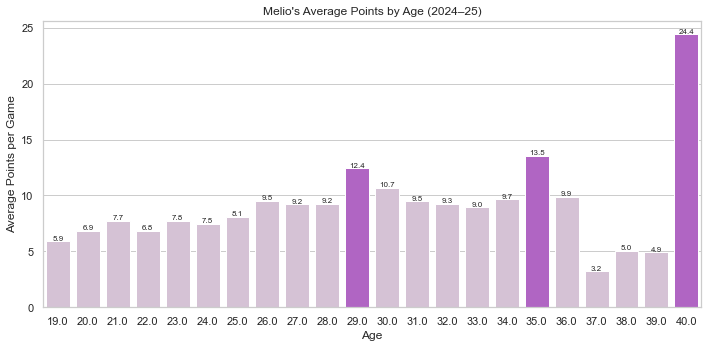

In [41]:
# Find the top 3 ages by scoring
top3_ages = (
    age_ppg.sort_values("PTS", ascending=False)
           .head(3)["Age"]
           .tolist()
)

# Build a list of colors for each bar
colors_q1 = [
    "mediumorchid" if age in top3_ages else "thistle"
    for age in age_ppg["Age"]
]

plt.figure(figsize=(10, 5))

ax = sns.barplot(
    data=age_ppg,
    x="Age",
    y="PTS",
    palette=colors_q1
)

plt.title("Melio's Average Points by Age (2024–25)")
plt.xlabel("Age")
plt.ylabel("Average Points per Game")

# Add labels to each bar
for bar in ax.patches:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f"{height:.1f}",
        ha="center",
        va="bottom",
        fontsize=8
    )

plt.tight_layout()
plt.show()

### Conclusion for Q1

The chart shows how scoring changes with age.

- The darkest purple bars show the **top 3 ages** with the highest average points.  
- Lighter purple bars show ages with lower scoring.  
- This pattern helps show which ages tend to score the most in the NBA.

Overall, scoring often peaks during a player's “prime years.”


## Q2 — Which teams have the highest average assists in 2024–25?

In this question, I want to find which NBA teams pass the ball the most.

I will:

1. Group players by team.  
2. Compute each team's average assists per game (AST).  
3. Choose the **top 10 teams**.  
4. Highlight the **top 3 teams** with a darker purple color.  
5. Make a horizontal bar chart for readability.


### Step 1: Compute average assists per team

Here I group the 2024–25 stats by team and compute the average assists per game for each team.


In [42]:
# Group by team and compute average assists
team_ast = per_game_2025.groupby("Team")["AST"].mean().reset_index()

# Sort from highest to lowest
team_ast = team_ast.sort_values("AST", ascending=False)

# Take the top 10 teams
top10_ast = team_ast.head(10)
top10_ast

,Team,AST
20,NOP,2.664000
4,BRK,2.475000
2,ATL,2.390476
9,DEN,2.347059
6,CHO,2.318519
5,CHI,2.227273
11,GSW,2.221739
29,TOR,2.217391
17,MIA,2.200000
8,DAL,2.191667


### Step 2: Highlight the top 3 teams

To emphasize the teams that assist the most:

- The **top 3 teams** by assists will be colored **medium orchid**.  
- The remaining 7 teams will use **thistle**.

This makes it easy to see which teams stand out for passing and teamwork.


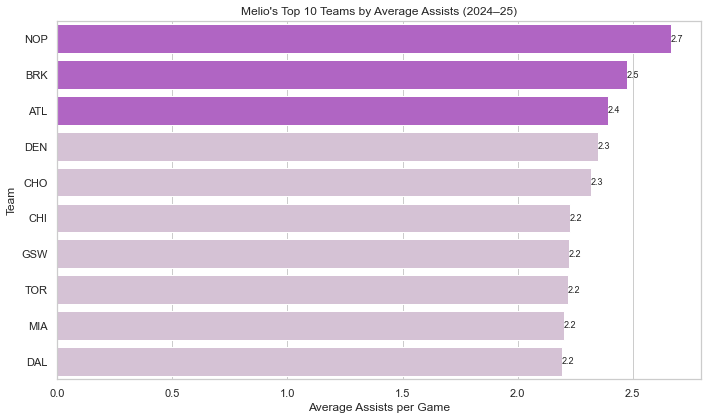

In [43]:
# Identify top 3 assisting teams
top3_teams = top10_ast.head(3)["Team"].tolist()

# Build color palette
colors_q2 = [
    "mediumorchid" if team in top3_teams else "thistle"
    for team in top10_ast["Team"]
]

plt.figure(figsize=(10, 6))

ax = sns.barplot(
    data=top10_ast,
    x="AST",
    y="Team",
    palette=colors_q2
)

plt.title("Melio's Top 10 Teams by Average Assists (2024–25)")
plt.xlabel("Average Assists per Game")
plt.ylabel("Team")

# Add labels to each bar
for bar in ax.patches:
    value = bar.get_width()
    ax.text(
        value,
        bar.get_y() + bar.get_height() / 2,
        f"{value:.1f}",
        ha="left",
        va="center",
        fontsize=9
    )

plt.tight_layout()
plt.show()

### Conclusion for Q2

The top 3 teams stand out clearly with darker bars.  
These teams pass the ball the most on average.

Higher assists usually show:

- stronger ball movement  
- better teamwork  
- more unselfish play  

The darker bars help highlight the most pass-heavy teams in the league.


## Q3 — Which players improved the most from 2023–24 to 2024–25?

In this question, I compare two seasons to see which players increased their scoring the most.

Steps:

1. Calculate each player's average points per game (PTS) in 2023–24.  
2. Calculate each player's average points per game in 2024–25.  
3. Merge both seasons together.  
4. Compute the change in scoring.  
5. Show the **top 10 most improved players**.


### Step 1: Compute scoring in both seasons

Here I compute each player's average points per game in 2023–24 and 2024–25.


In [44]:
# Average points per game for each season
pts_2024 = per_game_2024.groupby("Player")["PTS"].mean().reset_index()
pts_2025 = per_game_2025.groupby("Player")["PTS"].mean().reset_index()

# Merge seasons
merged = pts_2024.merge(pts_2025, on="Player", suffixes=["_24", "_25"])

# Calculate scoring improvement
merged["Change"] = merged["PTS_25"] - merged["PTS_24"]

# Top 10 improvements
top10_improved = merged.sort_values("Change", ascending=False).head(10)
top10_improved

,Player,PTS_24,PTS_25,Change
429,Ty Jerome,2.000000,12.500000,10.500000
371,Quentin Grimes,6.533333,15.566667,9.033333
132,Dyson Daniels,5.800000,14.100000,8.300000
70,Christian Braun,7.300000,15.400000,8.100000
346,Norman Powell,13.900000,21.800000,7.900000
426,Trey Murphy III,14.800000,21.200000,6.400000
195,James Harden,16.600000,22.800000,6.200000
334,Naji Marshall,7.100000,13.200000,6.100000
86,DaQuan Jeffries,0.800000,6.700000,5.900000
149,Gradey Dick,8.500000,14.400000,5.900000


### Conclusion for Q3

The table shows which players increased their scoring the most between the two seasons.

These improvements may be due to:

- increased minutes  
- a bigger role on their team  
- improved shooting  
- or changes in team roster or usage  

This simple comparison helps show which players made the biggest jumps.


## Q4 — How do LeBron James’s points and assists compare to league averages in 2024–25?

In this question, I compare LeBron’s 2024–25 scoring and assists to the league average.

Steps:

1. Select LeBron’s row from the 2024–25 table.  
2. Record his points (PTS) and assists (AST).  
3. Compute the league-wide averages for PTS and AST.  
4. Compare them using a simple bar chart.


### Step 1: Build a comparison table

Here I pull out LeBron's stats and compare them to the league averages.


In [45]:
# Grab LeBron's stats for 2024–25
lb_2025 = per_game_2025[per_game_2025["Player"] == "LeBron James"].iloc[0]

lb_2025_pts = lb_2025["PTS"]
lb_2025_ast = lb_2025["AST"]
league_pts = per_game_2025["PTS"].mean()
league_ast = per_game_2025["AST"].mean()

comparison = pd.DataFrame({
    "Stat": ["PTS", "AST"],
    "LeBron": [lb_2025_pts, lb_2025_ast],
    "League": [league_pts, league_ast]
})
comparison

,Stat,LeBron,League
0,PTS,24.4,8.564354
1,AST,8.2,2.060136


### Step 2: Visualize LeBron vs league averages

I use a bar chart to compare:

- LeBron’s points vs league average  
- LeBron’s assists vs league average  

Color choices:

- **medium orchid** for LeBron  
- **thistle** for the league  

This makes it easy to see who is higher.


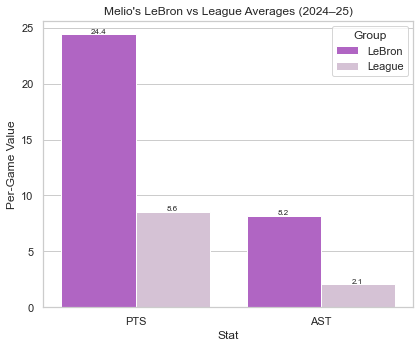

In [46]:
melted = comparison.melt(id_vars="Stat", var_name="Group", value_name="Value")

plt.figure(figsize=(6, 5))
ax = sns.barplot(
    data=melted,
    x="Stat",
    y="Value",
    hue="Group",
    palette=["mediumorchid", "thistle"]
)

plt.title("Melio's LeBron vs League Averages (2024–25)")
plt.xlabel("Stat")
plt.ylabel("Per-Game Value")

# Add numeric labels
for bar in ax.patches:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f"{height:.1f}",
        ha="center",
        va="bottom",
        fontsize=8
    )

plt.tight_layout()
plt.show()

### Conclusion for Q4

LeBron scores more and assists more than the average NBA player.

This shows that even in the 2024–25 season, he performs above league average in both areas.


## Q5 — Did LeBron James’s scoring and assists improve from 2023–24 to 2024–25?

For this question, I compare LeBron’s performance in two seasons:

- 2023–24 regular season  
- 2024–25 regular season  

Steps:

1. Find LeBron’s row in the 2023–24 per-game table.  
2. Find LeBron’s row in the 2024–25 per-game table.  
3. Pull out his points (PTS) and assists (AST) for each season.  
4. Compare the two seasons in a bar chart.


### Step 1: Build a table with LeBron’s stats for both seasons

Here I collect LeBron’s points and assists for 2023–24 and 2024–25.


In [47]:
# Find LeBron's stats in 2023–24
lb_2024 = per_game_2024[per_game_2024["Player"] == "LeBron James"].iloc[0]

# Points and assists in 2023–24
lb_2024_pts = lb_2024["PTS"]
lb_2024_ast = lb_2024["AST"]

# Points and assists in 2024–25 (already stored as lb_2025)
lb_2025_pts = lb_2025["PTS"]
lb_2025_ast = lb_2025["AST"]

# Build a comparison table for the two seasons
lebron_seasons = pd.DataFrame({
    "Stat": ["PTS", "AST"],
    "2023–24": [lb_2024_pts, lb_2024_ast],
    "2024–25": [lb_2025_pts, lb_2025_ast]
})
lebron_seasons

,Stat,2023–24,2024–25
0,PTS,25.7,24.4
1,AST,8.3,8.2


### Step 2: Visualize LeBron’s 2023–24 vs 2024–25 stats

Now I make a bar chart to compare LeBron’s points and assists across the two seasons.

Color choices:

- **thistle** for 2023–24  
- **medium orchid** for 2024–25  

This helps show if his numbers went up, down, or stayed the same.


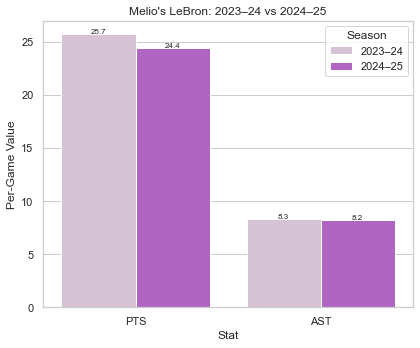

In [48]:
# Reshape the data for plotting
melted_lebron = lebron_seasons.melt(
    id_vars="Stat",
    var_name="Season",
    value_name="Value"
)

plt.figure(figsize=(6, 5))
ax = sns.barplot(
    data=melted_lebron,
    x="Stat",
    y="Value",
    hue="Season",
    palette=["thistle", "mediumorchid"]  # 2023–24 lighter, 2024–25 darker
)

plt.title("Melio's LeBron: 2023–24 vs 2024–25")
plt.xlabel("Stat")
plt.ylabel("Per-Game Value")

# Add labels on bars
for bar in ax.patches:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f"{height:.1f}",
        ha="center",
        va="bottom",
        fontsize=8
    )

plt.tight_layout()
plt.show()

### Conclusion for Q5

By comparing the two seasons side by side, I can see how LeBron’s scoring and assists changed from 2023–24 to 2024–25.

- If the 2024–25 bars are higher, his performance improved.  
- If they are lower, his scoring or playmaking dropped.  
- If they are about the same, his performance stayed steady.

This gives a simple view of how LeBron’s role or efficiency changed between the two seasons.


## Final Conclusions

- Average points per game change with age. Players in their prime tend to score more than very young or older players.  
- Some teams have higher average assists, which suggests more ball movement and team-focused offense.  
- Several players improved their scoring from 2023–24 to 2024–25, possibly due to more minutes or a bigger role.  
- LeBron James scores and passes more than the average NBA player in 2024–25.  
- Comparing his 2023–24 and 2024–25 stats shows how his scoring and assists changed between the two seasons.

This project demonstrates how to use web scraping, pandas, and Seaborn together to collect sports data, clean it lightly, and answer simple data questions with code and visualizations.
